# Analysis of Fatal Traffic Crashes in San Francisco

## Introduction
Traffic fatalities remain a critical public-safety concern in urban environments, where dense populations, multimodal transportation systems, and complex road networks interact on a daily basis. San Francisco, despite extensive traffic-safety initiatives such as Vision Zero, continues to experience fatal traffic crashes that raise important questions about when, where, and for whom these events are most likely to occur.

In this project, we analyze fatal traffic crashes in San Francisco using the Traffic Crashes Resulting in Fatality dataset published by DataSF and made available through the U.S. government’s open data portal (https://catalog.data.gov/dataset/traffic-crashes-resulting-in-fatality). Because the dataset is actively updated over time, we include a fixed snapshot of the data used in this analysis in the `data/` directory to ensure full reproducibility of our results.

We begin by examining temporal patterns in traffic fatalities, analyzing how fatal crashes vary by year, month, and time of day to characterize long-term changes, seasonal variation, and daily risk periods. We then investigate the spatial distribution of fatal crashes across San Francisco by mapping collision locations and aggregating deaths by blocks and neighborhoods. Finally, we focus on pedestrian-related fatalities, which is a central concern in urban traffic safety. We analyze demographic and behavioral characteristics such as age, gender, and collision type to identify common traits and potential vulnerability patterns among fatal pedestrian crashes.

## Data and data cleaning
Each row in the dataset corresponds to a traffic collision in San Francisco that resulted in at least one fatality. The dataset spans multiple years and contains a few hundred observations. Key groups of variables include:
- **Temporal** information, such as the collision date and time
- **Location information**, including latitude and longitude coordinates and textual location descriptors
- **Crash characteristics**, such as collision type and involved party information.
- **Participant attributes**, including demographic and behavioral variables for road users involved in the crash


In [1]:
import pandas as pd
df = pd.read_csv("data/Traffic_Crashes_Resulting_in_Fatality.csv")
print(df.shape)
print(df.columns)
df.head()

(345, 28)
Index(['unique_id', 'case_id_fkey', 'latitude', 'longitude', 'collision_year',
       'death_date', 'death_time', 'death_datetime', 'collision_date',
       'collision_time', 'collision_datetime', 'location', 'age', 'sex',
       'deceased', 'collision_type', 'street_type', 'on_vz_hin_2017',
       'in_coc_2018', 'publish', 'on_vz_hin_2022', 'in_epa_2021', 'point',
       'analysis_neighborhood', 'supervisor_district', 'police_district',
       'data_as_of', 'data_loaded_at'],
      dtype='object')


,unique_id,case_id_fkey,latitude,longitude,collision_year,death_date,death_time,death_datetime,collision_date,collision_time,...,in_coc_2018,publish,on_vz_hin_2022,in_epa_2021,point,analysis_neighborhood,supervisor_district,police_district,data_as_of,data_loaded_at
0,1,140236301,37.710409,-122.404226,2014,2014/03/20,11:21:00,2014/03/20 11:21:00 AM,2014/03/20,NaN,...,False,True,True,False,POINT (-122.404226037 37.710409217),Bayview Hunters Point,10.0,INGLESIDE,2024/09/18 12:00:00 AM,2025/11/06 10:51:39 AM
1,2,140755533,37.725476,-122.394243,2014,2014/09/08,16:38:00,2014/09/08 04:38:00 PM,2014/09/08,05:10:00,...,True,True,True,True,POINT (-122.394243493 37.72547565),Bayview Hunters Point,10.0,BAYVIEW,2024/09/18 12:00:00 AM,2025/11/06 10:51:39 AM
2,4,140365546,37.748255,-122.413669,2014,2014/05/03,17:20:00,2014/05/03 05:20:00 PM,2014/05/03,02:24:00,...,False,True,True,False,POINT (-122.413668844 37.748255329),Mission,9.0,MISSION,2024/09/18 12:00:00 AM,2025/11/06 10:51:39 AM
3,16,150562049,37.777300,-122.419694,2015,2015/06/30,06:00:00,2015/06/30 06:00:00 AM,2015/06/28,03:52:00,...,False,True,True,True,POINT (-122.419693566 37.777299856),Tenderloin,5.0,NORTHERN,2024/09/18 12:00:00 AM,2025/11/06 10:51:39 AM
4,17,140104811,37.778251,-122.419883,2014,2014/02/06,10:20:00,2014/02/06 10:20:00 AM,2014/02/05,02:26:00,...,False,True,True,True,POINT (-122.419883231 37.778251017),Hayes Valley,5.0,NORTHERN,2024/09/18 12:00:00 AM,2025/11/06 10:51:39 AM


The dataset is already well-structured and requires minimal cleaning. No imputation, record deletion, or recoding of core variables was performed. Instead, preprocessing focused on deriving temporal features from existing date and time fields to support the study of crash timing patterns.

Specifically, we parsed the collision datetime field into a standardized datetime format and extracted the following variables:
- **Year**, to examine long-term trends in fatal crashes;
- **Month**, to study seasonal variation;
- **Time-of-day category**, grouping hours into four interpretable periods:
  - Night (00–05),
  - Morning (06–11),
  - Afternoon (12–17),
  - Evening (18–23).

Aside from these derived features, all original variables were left unchanged and used directly in subsequent analyses.

## Temporal patterns in fatal traffic crashes
In the first analysis notebook, we examined temporal patterns in fatal traffic crashes in San Francisco. The goal of this analysis was to understand when fatal crashes are most likely to occur across different time scales, including long-term trends, seasonal variation, and intraday timing.

### Death trend by year
We first aggregated fatal crashes by year from 2014 to 2025 to examine long-term trends. The resulting time series shows noticeable year-to-year variation rather than a smooth monotonic trend. Several recent years exhibit relatively high numbers of fatalities, while earlier years tend to have lower counts. The lower count in 2025 is likely because the year is incomplete in the dataset.

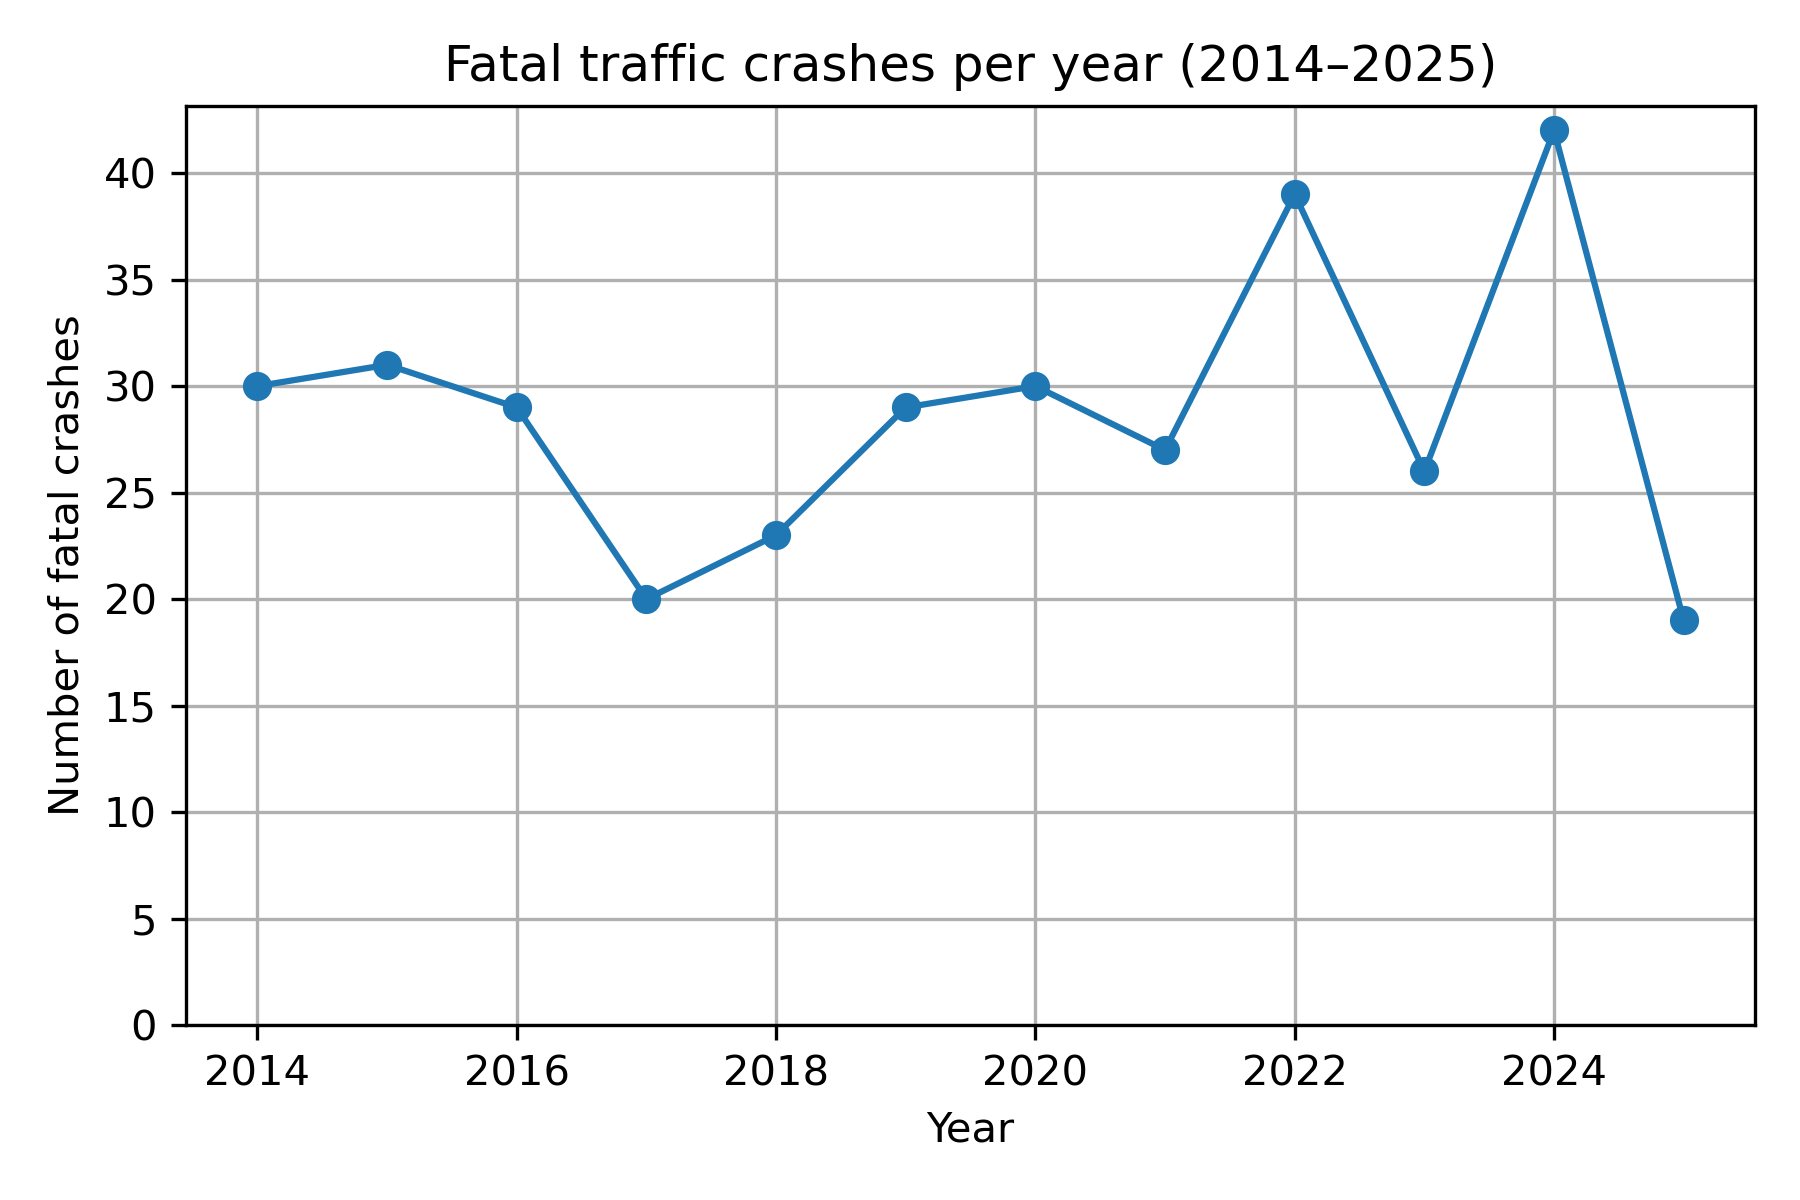

In [2]:
from IPython.display import Image, display
display(Image(filename="results/deaths_by_year.png"))

### Death trend by month
To explore seasonal patterns, we pooled all years and examined fatal crashes by month. The result histogram shows that fatal traffic crashes are not evenly distributed across the year. Some months show higher numbers of fatal crashes than others, indicating possible seasonal patterns. In particular, late winter/early spring and late summer months tend to have higher counts, while some spring months show fewer fatal crashes.

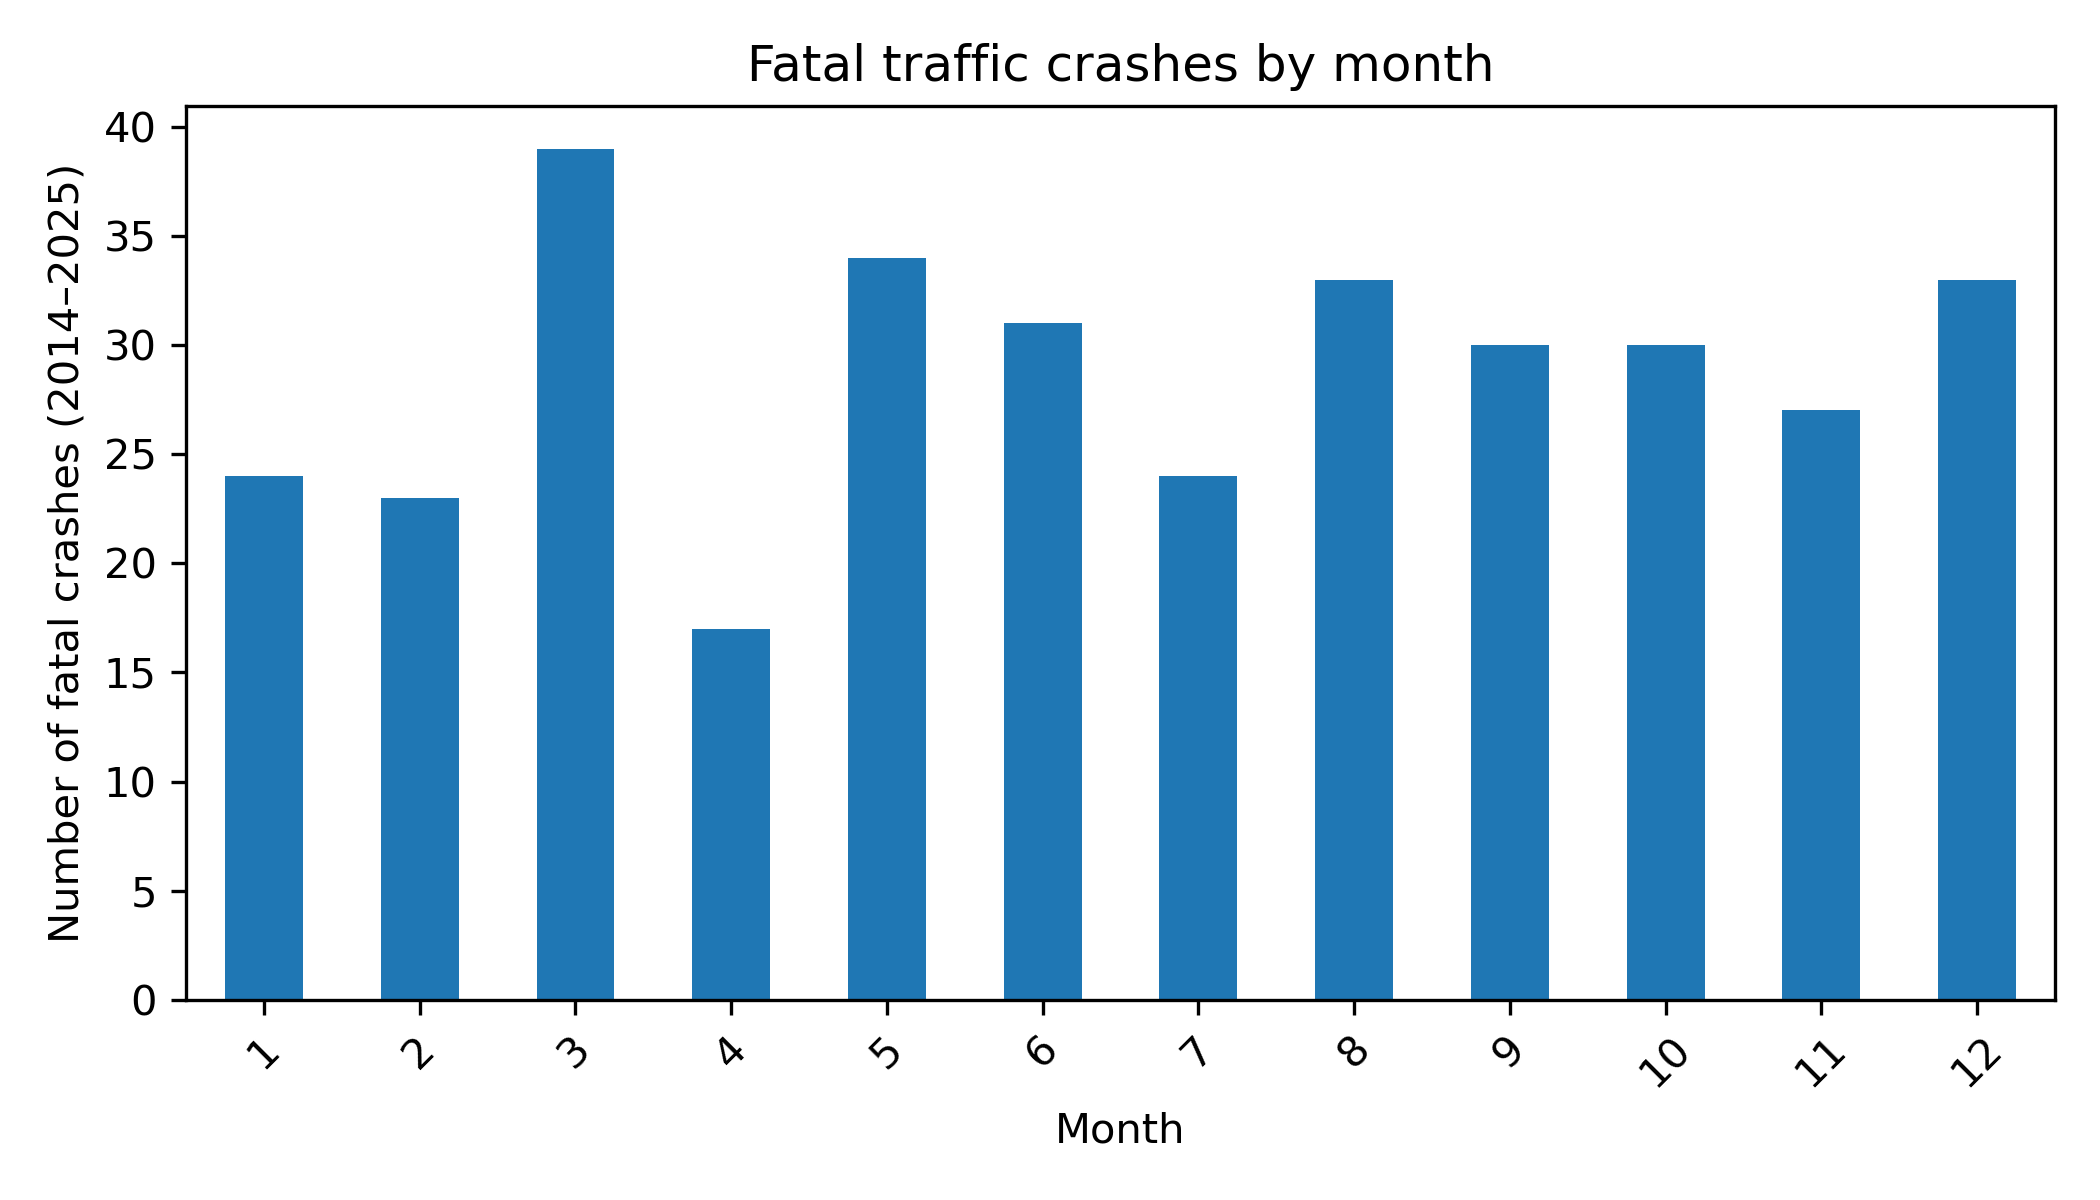

In [3]:
display(Image(filename="results/deaths_by_month.png"))

### Death trends by time of day
We next examined fatal crashes by time of day, using four interpretable categories derived from the hour of the collision. Fatal traffic crashes vary substantially by time of day.
The highest number of fatal crashes occurs during nighttime hours,
followed closely by the evening and afternoon.
Morning hours have the fewest fatal crashes.
This suggests that reduced visibility and nighttime driving conditions
may be associated with higher fatality risk.

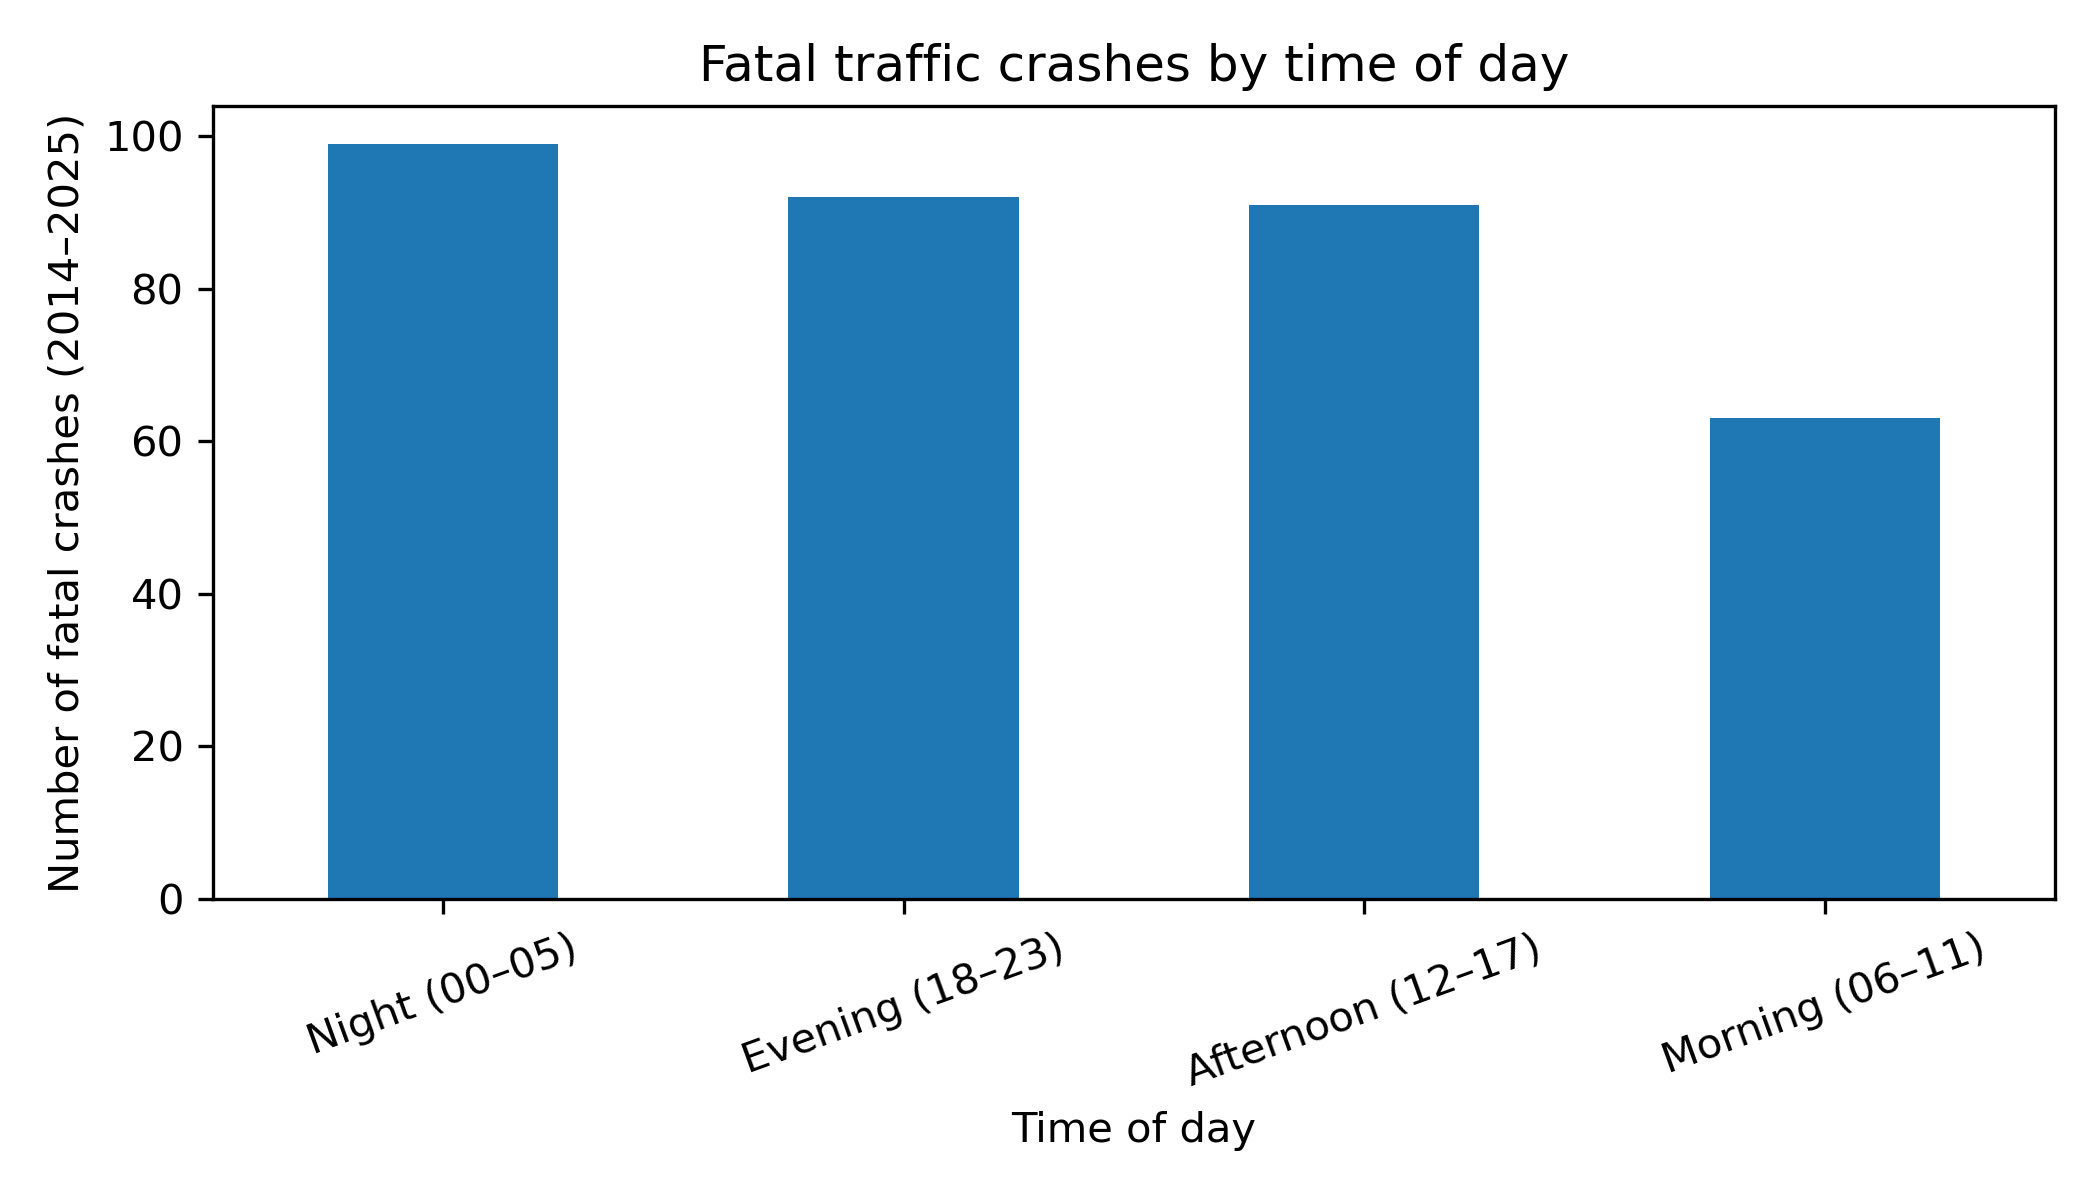

In [4]:
display(Image(filename="results/deaths_by_time_of_day.png"))

Taken together, these temporal patterns indicate that fatal traffic crashes in San Francisco are shaped by both long-term dynamics and short-term timing effects. The presence of seasonality and time-of-day differences suggests that crash risk is not constant, and that safety interventions such as nighttime enforcement, lighting improvements, or seasonal awareness campaigns may be particularly effective.

## Spatial distribution of fatal traffic crashes
In the second analysis notebook, we focus on the spatial distribution of fatalities, using crash location information to identify high-risk areas and visualize geographic patterns over time.

### High-fatality blocks
To identify locations with disproportionately high numbers of fatalities, we aggregated crashes by street block. While many locations experienced only a single fatal crash during the study period, a small number of blocks appear repeatedly. Identifying such locations is particularly important for traffic-safety planning, as targeted interventions at a small number of sites may yield outsized benefits.

In [5]:
neighborhood_counts = pd.read_csv("results/neighborhood_counts.csv")
neighborhood_counts

,Unnamed: 0,Neighborhood,Deaths
0,0,Mission,38
1,1,Bayview Hunters Point,30
2,2,Tenderloin,28
3,3,South of Market,27
4,4,Financial District/South Beach,15
5,5,Sunset/Parkside,14
6,6,Marina,13
7,7,West of Twin Peaks,13
8,8,Hayes Valley,12
9,9,Portola,11


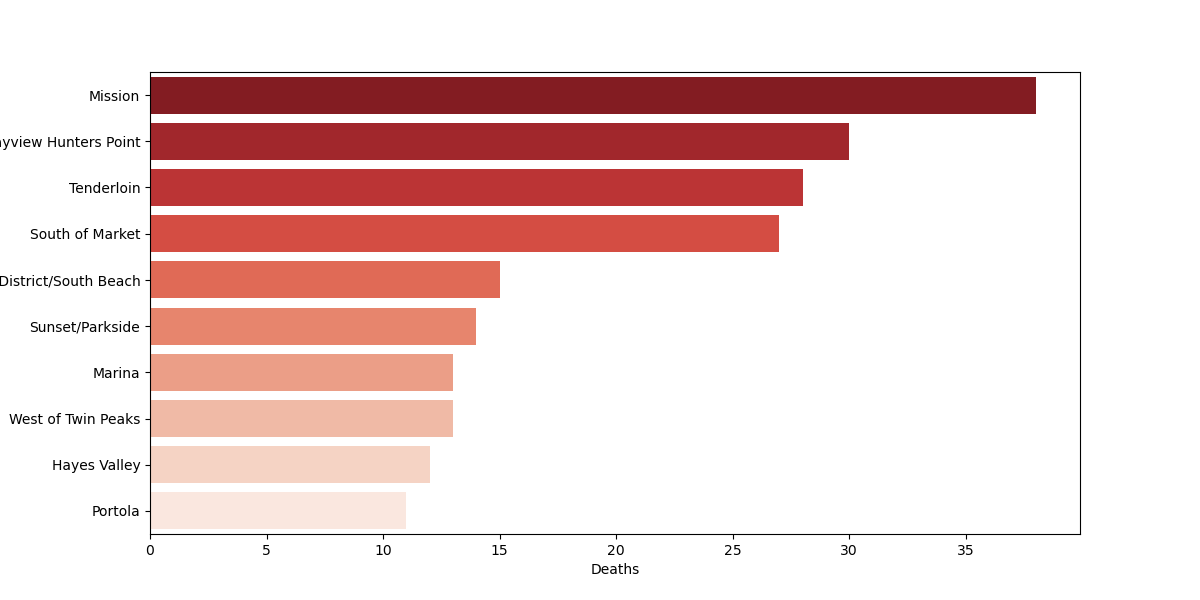

In [6]:
display(Image(filename="results/neighborhood_deaths.png"))

### Heatmaps of fatal crashes
We also visualize the overall spatial pattern of fatal crashes by constructing location heatmaps using crash coordinates. At the citywide level, the heatmaps show clear concentration in certain corridors and neighborhoods rather than a diffuse pattern. This confirms that fatal crash risk is spatially structured. Besides, we also include layers such as the year, month of crashes and the age of victims to help understand the spatial distribution within various subgroups

In [17]:
from IPython.display import HTML

display(HTML('<a href="results/Section2_Fatality_Heatmap.html" target="_blank">Open interactive heatmap</a>'))


## Pedestrian-related fatalities
Pedestrians are among the most vulnerable road users in dense urban environments, and fatal pedestrian crashes are a central concern for traffic safety policy. In the third analysis notebook, we isolate crashes involving pedestrians and the goal is to identify common traits and patterns that can motivate targeted safety interventions.

### Demographic analysis
We examines the demographic traits of pedestrian fatalities, with a focus on age, sex, and collision type. We first compute standard summary statistics for pedestrian age. Pedestrian fatalities are disproportionately concentrated among older individuals. The median age exceeds 60 years, indicating that more than half of pedestrian deaths occur among seniors. The wide interquartile range and high maximum age further suggest that age-related vulnerability plays an important role in pedestrian fatality risk. The exact-age plot reveals a clear upward trend in pedestrian fatalities with age. Fatalities are rare among children and young adults, increase gradually through middle age, and rise sharply among individuals aged 60 and above.

In [18]:
df = pd.read_csv("data/cleaned_fatality_data.csv")
df_ped = df[df['deceased'] == 'Pedestrian'].copy()
age_summary = df_ped['age'].describe()
age_summary

count    199.000000
mean      59.100503
std       20.629242
min        0.000000
25%       47.000000
50%       62.000000
75%       76.500000
max       95.000000
Name: age, dtype: float64

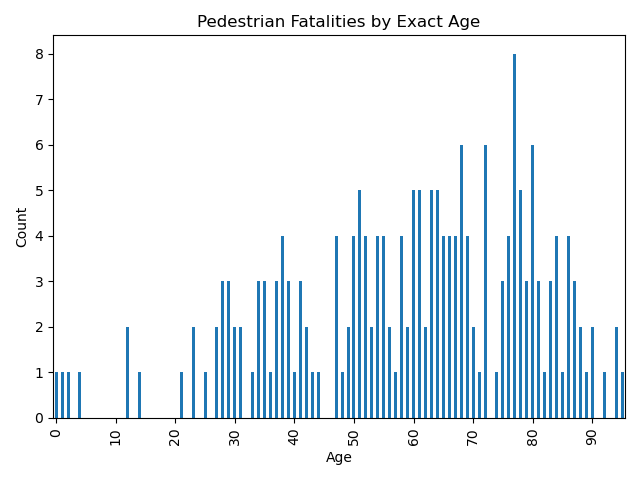

In [20]:
display(Image("results/Ped_age_count.png"))

While exact ages are informative, grouped age categories are more interpretable for policy and public health analysis. We therefore bin ages into the following categories:
- 0–18 (children)
- 19–34 (young adults)
- 35–49 (midlife)
- 50–64 (pre-retirement)
- 65+ (older adults)

The next figure reveals a pattern consistent with previous results: Individuals aged 65 and above account for the largest share of deaths, followed by those aged 50–64. Children and young adults represent a relatively small fraction of fatalities.

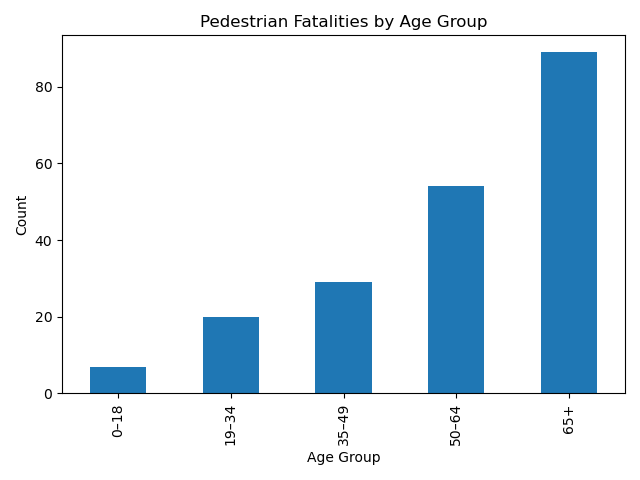

In [21]:
display(Image("results/Ped_age_group.png"))

We examine the gender characteristics and found pedestrian fatalities skew male, with males accounting for approximately 60% of deaths. However, the sex imbalance is less extreme than that in age. We may test whether such a skewness exist for male. Let $H_0: p= 0.5$ where $p$ denote the probability that a pedestrian fatality involves a male victim. A binomial test indicate that sex imbalance is significant.

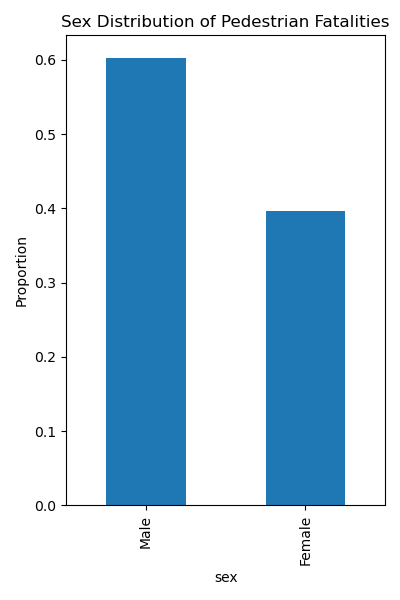

In [22]:
display(Image("results/Ped_sex.png"))

In [25]:
import json
from pprint import pprint
with open("results/ped_gender_binomial.json") as f:
    ped_gender = json.load(f)

pd.DataFrame([ped_gender])

,n,male,female,p_hat,p_value,ci_low,ci_high
0,199,120,79,0.603015,0.004455,0.531404,0.671509


Finally, we examine the distribution of collision types involving pedestrians. The vast majority of pedestrian fatalities involve collisions with motor vehicles. Other collision types such as light rail vehicles, motorcycles, or buses, occur only rarely. This highlights motor vehicle traffic as the dominant source of pedestrian fatality risk.

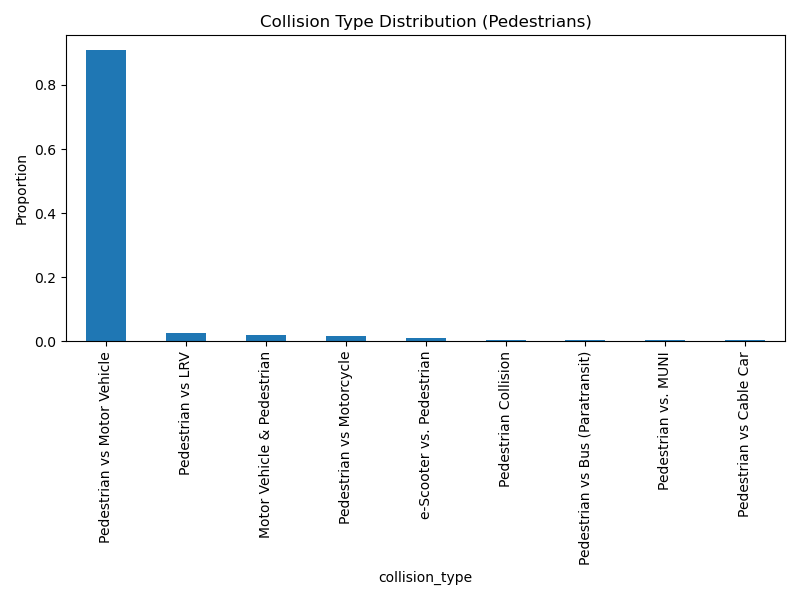

In [26]:
display(Image("results/Ped_collision_type.png"))

### Temporal analysis
This section examines how pedestrian fatalities vary over time. Temporal analysis provides insight into both long-run trends and short-run daily patterns, which are critical for understanding pedestrian risk. We begin by analyzing pedestrian fatalities by calendar year. The time series exhibits noticeable variation across years.

To examine within-day temporal patterns, we use the dataset’s time_of_day variable, which include ranges
- Night (00–05)
- Morning (06–11)
- Afternoon (12–17)
- Evening (18–23)

The result shows that fewer fatalities occur during morning and afternoon periods.

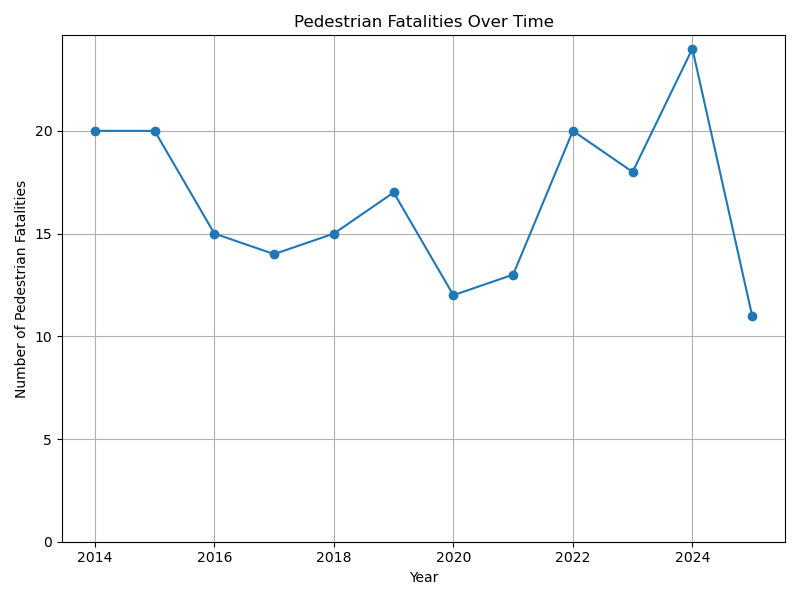

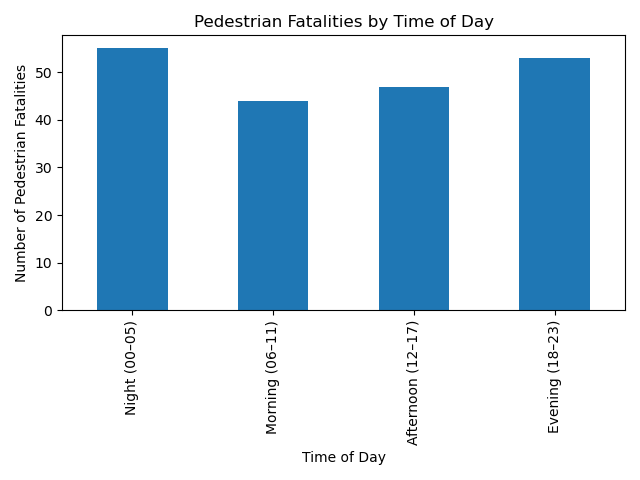

In [27]:
display(Image("results/Ped_by_year.png"))
display(Image("results/Ped_by_timeofday.png"))

To contextualize the pedestrian-specific temporal patterns, we compare them with analogous analyses conducted on the full dataset of fatal traffic crashes. Overall traffic fatalities and pedestrian fatalities both show noticeable fluctuations across years, with increases and decreases occurring over relatively short time spans. Despite these similarities, peaks and troughs in pedestrian fatalities do not always coincide with those observed in total fatalities. In some years, pedestrian deaths rise even when total fatal crashes remain relatively stable, and vice versa. This divergence indicates that pedestrian fatalities are not merely a fixed proportion of overall traffic deaths. This suggests the influence of pedestrian-specific factors, such as changes in walking exposure, urban development, or pedestrian infrastructure, that may not affect other road users in the same way. In the full dataset, fatal crashes are least frequent during morning hours, while night, afternoon, and evening periods all exhibit relatively high fatality counts. As for pedestrian fatalities, the distribution across morning, afternoon, evening, and night appears more balanced than in the full dataset and morning hours consistently represent a lower-risk period

### Spatial analysis

To examine geographic clustering of pedestrian fatalities, we construct a spatial density heatmap using the recorded latitude and longitude of each fatal pedestrian crash.

The resulting heatmap shows that pedestrian fatalities are not uniformly distributed across space. Instead, they exhibit clear geographic clustering, with several localized areas displaying elevated concentrations of fatalities. These hotspots suggest persistent spatial patterns rather than isolated incidents.

It is important to note that the heatmap reflects raw fatality counts and does not account for pedestrian exposure or population density. As such, the visualization should be interpreted as indicating locations where fatalities occur repeatedly, rather than areas of elevated risk per pedestrian.

In [28]:

display(HTML('<a href="results/Ped_heatmap.html" target="_blank">Open interactive heatmap</a>'))


To examine spatial concentration at a policy-relevant scale, we aggregate pedestrian fatalities by
`analysis_neighborhood` and examine the distribution of counts across neighborhoods.

Pedestrian fatalities are unevenly distributed across neighborhoods. A small number of neighborhoods
account for a disproportionately large share of pedestrian deaths. In particular, the top five
neighborhoods account for around 40% of all pedestrian fatalities, indicating strong
spatial concentration rather than uniform distribution across the city, which is consistent with the heatmap result.

In [29]:
# Count pedestrian fatalities by neighborhood
neigh_counts = (
    df_ped["analysis_neighborhood"]
    .value_counts()
    .rename("count")
)

# Top neighborhoods
top_neigh = neigh_counts.head(10)
top_neigh

analysis_neighborhood
Tenderloin                        21
South of Market                   17
Mission                           16
Bayview Hunters Point             15
Sunset/Parkside                   10
Marina                            10
West of Twin Peaks                10
Financial District/South Beach    10
Outer Richmond                     8
Excelsior                          7
Name: count, dtype: int64

In [30]:
total = neigh_counts.sum()

top5_share = neigh_counts.head(5).sum() / total
top10_share = neigh_counts.head(10).sum() / total

print(f"Top 5 neighborhoods account for {top5_share:.1%} of pedestrian fatalities")
print(f"Top 10 neighborhoods account for {top10_share:.1%} of pedestrian fatalities")

Top 5 neighborhoods account for 39.9% of pedestrian fatalities
Top 10 neighborhoods account for 62.6% of pedestrian fatalities


Since our sample size is small, exact fatality locations are rarely repeated. However, street names recur across multiple incidents. Therefore, we decided to extract street names from location and aggregate pedestrian fatalities by street.

This analysis shows that pedestrian fatalities are repeated along some major streets, even though exact addresses are unique. Note that a single fatality may occur at an intersection and contribute to multiple streets, sum of street-level counts should be greater than the sample size.

In [32]:
top_neigh = pd.read_csv("results/Ped_street.csv")
top_neigh.head(10)

,streets,count
0,MISSION ST,8
1,GEARY BLVD,7
2,GEARY BOULEVARD,7
3,VAN NESS AVE,6
4,MISSION STREET,5
5,ULLOA ST,5
6,LENOX WAY,4
7,LOMBARD ST,4
8,16TH ST,4
9,GOLDEN GATE AVENUE,4


### Clustering
Previous results give us the intuition that some clustering patterns exist. To quantitatively assess global spatial clustering, we compute the Nearest Neighbor Index (NNI) based on the geographic coordinates of pedestrian fatalities. Recall that $$NNI=\frac{\text{Observed Mean Distance}}{\text{Expected Mean Distance}}$$
$NNI<1$ indicates a clustered pattern, $NNI=1$ suggests a random pattern and $NNI>1$ shows a dispersed pattern

Our test get $NNI=0.691$, providing evidence that pedestrian fatalities are spatially clustered rather than randomly distributed.

In [33]:
with open("results/pedestrian_nni.json") as f:
    nni = json.load(f)

pd.DataFrame([nni])

,observed_mean_nn_distance,expected_mean_nn_distance,NNI,n_points
0,0.00292,0.004224,0.691314,199


We then apply the DBSCAN clustering algorithm to the geographic coordinates. DBSCAN identifies seven spatial clusters, including one large cluster containing over sixty fatalities, as well as several smaller clusters. At the same time, roughly half of all fatalities are classified as noise. These results suggest that pedestrian fatalities are characterized by a combination of localized high-density areas and dispersed single events, consistent with previous results.

In [34]:
with open("results/pedestrian_dbscan_summary.json") as f:
    dbscan = json.load(f)

pd.DataFrame([dbscan])

,eps,min_samples,n_clusters,n_noise
0,0.15,4,7,101


In [35]:
pd.read_csv("results/pedestrian_dbscan_cluster_sizes.csv")

,cluster,0
0,0,62
1,2,11
2,3,9
3,1,4
4,4,4
5,5,4
6,6,4


In [36]:
display(HTML('<a href="results/DBSCAN_cluster.html" target="_blank">Open interactive heatmap</a>'))